# Лабораторная работа №3. (№6 по книге Буре)

## Жолобов Ефим

### 0. Импортируем нужные библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import statsmodels.api as sm
%matplotlib inline

In [2]:
large = 34; med = 22; small = 16
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

### 1. Смоделируйте ряд, состоящий из 30 наблюдений, по формуле

### $y_t=\alpha+\beta_1t+\beta_2\sin(\frac{2\pi}{5}t)+\beta_3\cos(\frac{2\pi}{5}t)+\varepsilon_t \quad t=\overline{1,30}$ $\alpha,\beta_1>0, \beta_2,\beta_3$ - произвольные константы. 
### $\varepsilon_1,\ldots,\varepsilon_{30}$ - выборка из нормального распределения $N(0,\sigma^2), (\frac{1}{\sqrt{2}}\leq\sigma\leq 2)$
### фактор $t$ фактически представляет собой время

In [3]:
t=np.linspace(1,30,30)
alpha = np.pi
beta = np.array([1/np.exp(1), 1 , 1])
#alpha = 30
#beta = np.array([4, 2 , 2])
tr_trend = alpha + t * beta[0]
tr_per = beta[1]*np.sin(2*np.pi*t/5)+beta[2]*np.cos(2*np.pi*t/5)

eps=stats.norm.rvs(loc=0, scale=1/np.sqrt(2), size=30, random_state=0)
print(eps)

[ 1.24737338  0.28295388  0.69207227  1.58455078  1.32056292 -0.69103982
  0.67181396 -0.10702571 -0.07298675  0.29033699  0.10185419  1.02832666
  0.53813494  0.08603723  0.3138587   0.23594338  1.05647344 -0.1450688
  0.22137229 -0.60393689 -1.80523641  0.46217814  0.6112487  -0.52478992
  1.60495889 -1.02839183  0.03235616 -0.13235897  1.08383858  1.03899355]


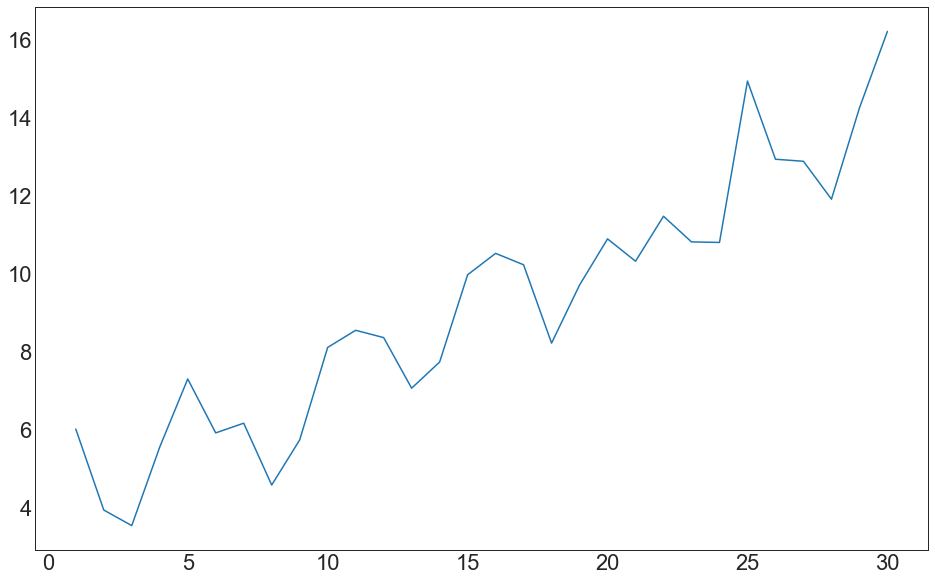

In [4]:
plt.plot(t, tr_trend+tr_per+eps)

### 2. Учитывая свойства тригонометрических функций, аналитически определите период $T$ периодической (сезонной) составляющей $f_2(t)=\beta_2\sin(\frac{2\pi}{5}t)+\beta_3\cos(\frac{2\pi}{5}t)$.

### Период $T$ равен 5 исходя из вида функций. Для проверки достоверности выведем график.

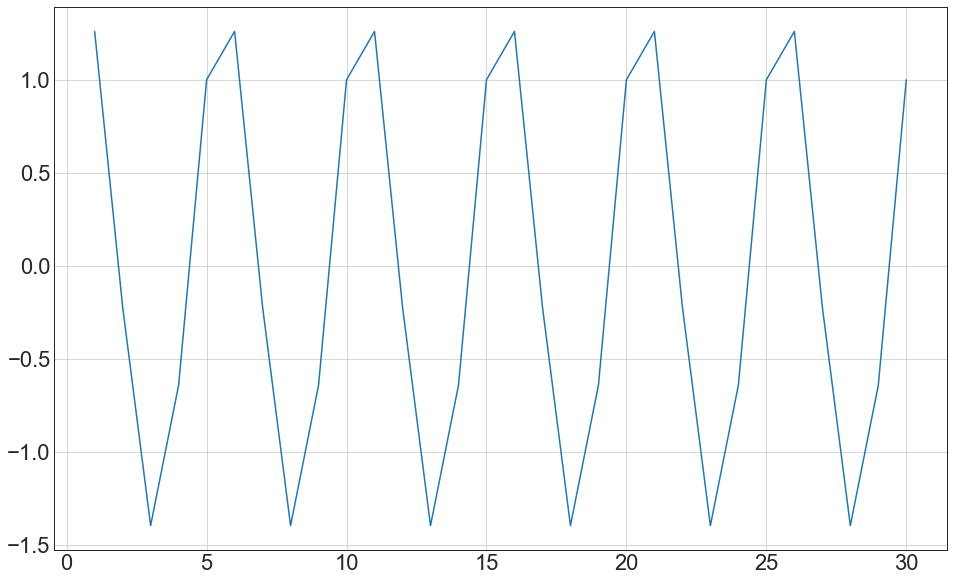

In [5]:
plt.plot(t, tr_per)
plt.grid(True)

### 3. Получите статистическую оценку тренда $f_1(t)=\alpha+\beta t$ и периодической составляющей $f_2(t)$ методом наименьших квадратов.

In [6]:
t = t.reshape((30,1))
ones = np.ones((30,1))
sin_t = np.sin(2*np.pi*t/5)
cos_t = np.cos(2*np.pi*t/5)
X = np.hstack((ones,t,sin_t,cos_t))
print('X= ',X)
y=tr_trend+tr_per+eps

X=  [[ 1.00000000e+00  1.00000000e+00  9.51056516e-01  3.09016994e-01]
 [ 1.00000000e+00  2.00000000e+00  5.87785252e-01 -8.09016994e-01]
 [ 1.00000000e+00  3.00000000e+00 -5.87785252e-01 -8.09016994e-01]
 [ 1.00000000e+00  4.00000000e+00 -9.51056516e-01  3.09016994e-01]
 [ 1.00000000e+00  5.00000000e+00 -2.44929360e-16  1.00000000e+00]
 [ 1.00000000e+00  6.00000000e+00  9.51056516e-01  3.09016994e-01]
 [ 1.00000000e+00  7.00000000e+00  5.87785252e-01 -8.09016994e-01]
 [ 1.00000000e+00  8.00000000e+00 -5.87785252e-01 -8.09016994e-01]
 [ 1.00000000e+00  9.00000000e+00 -9.51056516e-01  3.09016994e-01]
 [ 1.00000000e+00  1.00000000e+01 -4.89858720e-16  1.00000000e+00]
 [ 1.00000000e+00  1.10000000e+01  9.51056516e-01  3.09016994e-01]
 [ 1.00000000e+00  1.20000000e+01  5.87785252e-01 -8.09016994e-01]
 [ 1.00000000e+00  1.30000000e+01 -5.87785252e-01 -8.09016994e-01]
 [ 1.00000000e+00  1.40000000e+01 -9.51056516e-01  3.09016994e-01]
 [ 1.00000000e+00  1.50000000e+01 -7.34788079e-16  1.00000

In [7]:
def LR(X,y):
    LP = np.dot(X.T,X)
    RP = np.dot(X.T,y)
    res = np.linalg.solve(LP,RP)
    return res

def lp(X, m):
    return np.dot(X,m)



In [8]:
m = LR(X, y)
print(m)

[3.78085857 0.3468395  0.77868659 1.02519977]


### 4. Вычислить значения $tr_t^{(1)},\quad t=\overline{1,30}$. Сравните полученную оценку тренда $tr_t^{(1)}$ и сам тренд $f_1(t)=\alpha+\beta t$ и постройте их на одном графике. (с периодической составляющей и общей оценкой поступить аналогично).

In [9]:
est_trend=lp(X[:,:2],m[:2])

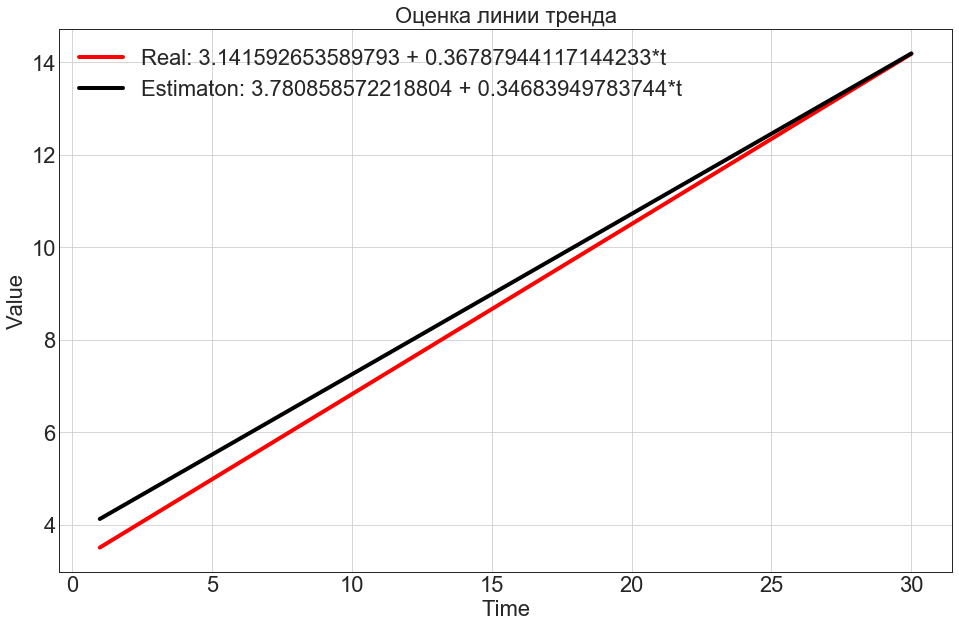

In [10]:
plt.title("Оценка линии тренда")
plt.plot(t, tr_trend, label=('Real: ' + str(alpha) + ' + ' + str(beta[0]) + "*t" ), color="red", linewidth=4)
plt.plot(t, est_trend, label=('Estimaton: ' + str(m[0])  + ' + ' + str(m[1])+ "*t"), color="black", linewidth=4)
plt.ylabel('Value')
plt.xlabel('Time')
plt.legend()
plt.grid()
plt.show()

In [11]:
est_per=lp(X[:,2:],m[2:])

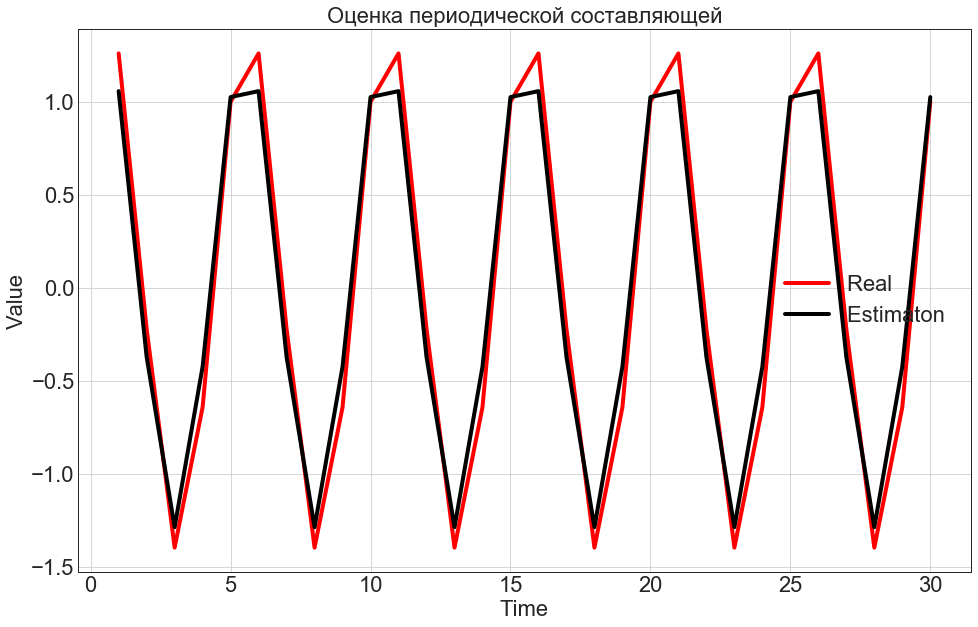

In [12]:
plt.title("Оценка периодической составляющей")
plt.plot(t, tr_per, label=('Real ' ), color="red", linewidth=4)
plt.plot(t, est_per, label=('Estimaton '), color="black", linewidth=4)
plt.ylabel('Value')
plt.xlabel('Time')
plt.legend()
plt.grid()
plt.show()

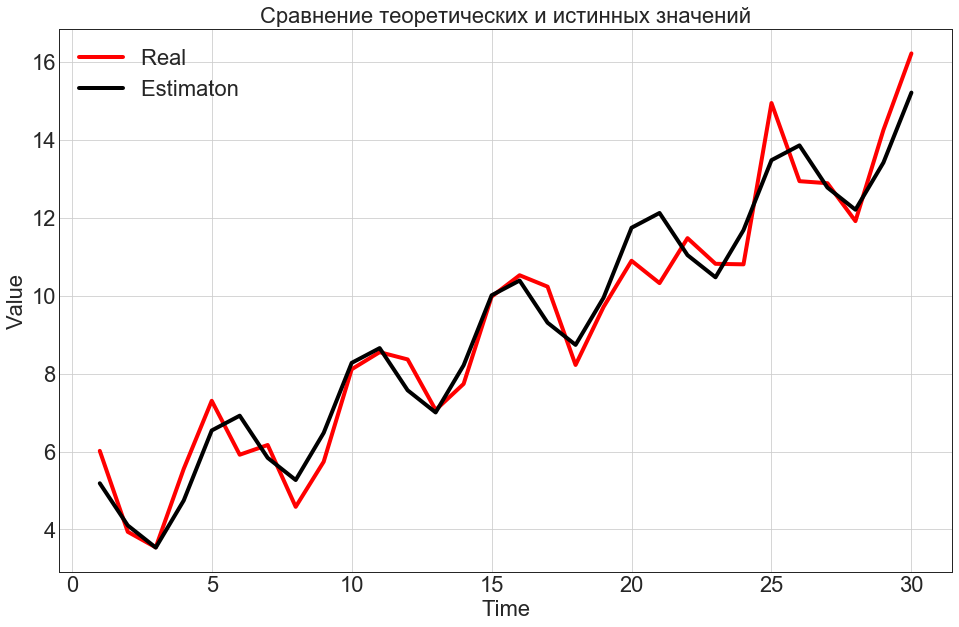

In [13]:
plt.title("Сравнение теоретических и истинных значений")
plt.plot(t, y, label=('Real ' ), color="red", linewidth=4)
plt.plot(t, lp(X,m), label=('Estimaton '), color="black", linewidth=4)
plt.ylabel('Value')
plt.xlabel('Time')
plt.legend()
plt.grid()
plt.show()

### 5. Другой подход оценки $tr_t$ и $S_t$.

In [14]:
m_tr = LR(X[:,:2], y)
print(m_tr)
est_tr_=lp(X[:,:2],m_tr)


[3.7856762  0.34652868]


### 6. Устраните новую оценку тренда из исходного временного ряда. Постройте график полученных значений

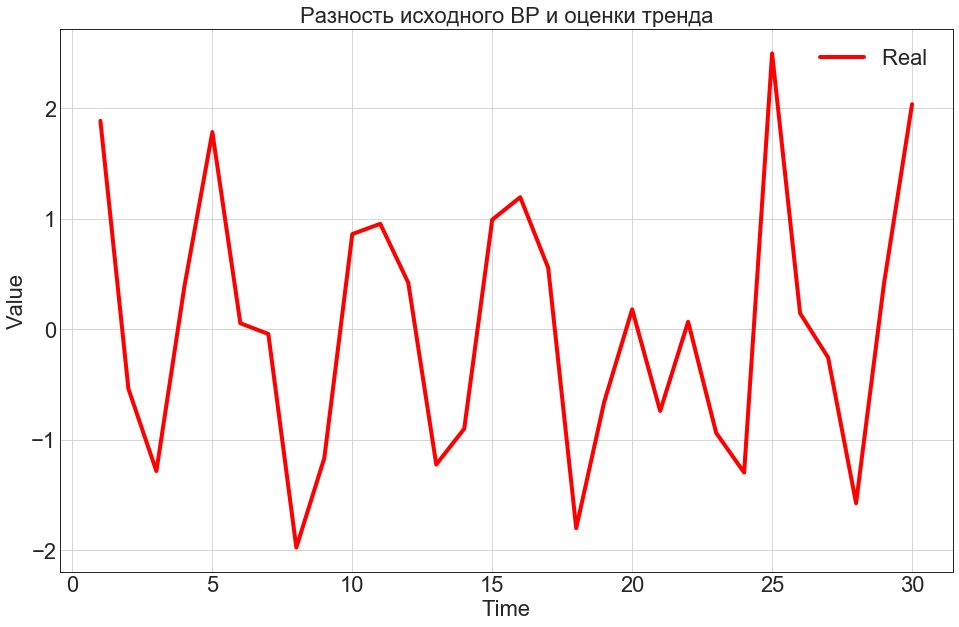

In [15]:
y_ntr=y-est_tr_

plt.title("Разность исходного ВР и оценки тренда")
plt.plot(t, y_ntr, label=('Real ' ), color="red", linewidth=4)
plt.ylabel('Value')
plt.xlabel('Time')
plt.legend()
plt.grid()
plt.show()


### 7.  Найдите оценку периодической составляющей для каждого из моментов времени, входящих в период.

In [16]:
est_per_ = y_ntr.reshape(6,5).sum(axis=0)/6
print(est_per_)

[ 0.58097568  0.03328774 -1.46711531 -0.53749853  1.39035041]


### 8. Сравните полученную оценку тренда $tr_t^{(2)}$ и $f_1(t)$. Постройте их на одном графике. (Аналогично для периодической составляющей).

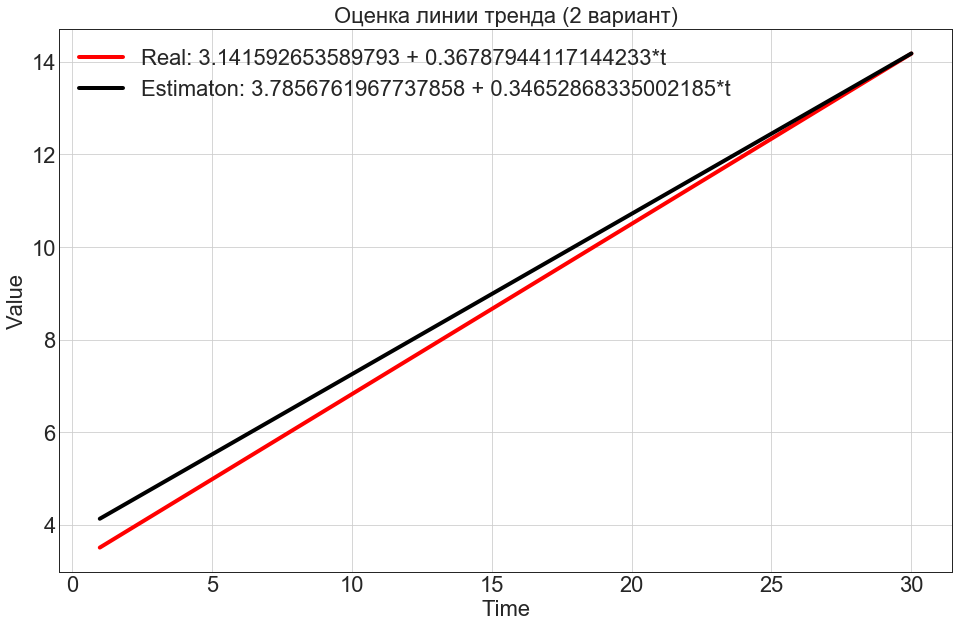

In [17]:
plt.title("Оценка линии тренда (2 вариант)")
plt.plot(t, tr_trend, label=('Real: ' + str(alpha) + ' + ' + str(beta[0]) + "*t" ), color="red", linewidth=4)
plt.plot(t, est_tr_, label=('Estimaton: ' + str(m_tr[0])  + ' + ' + str(m_tr[1])+ "*t"), color="black", linewidth=4)
plt.ylabel('Value')
plt.xlabel('Time')
plt.legend()
plt.grid()
plt.show()

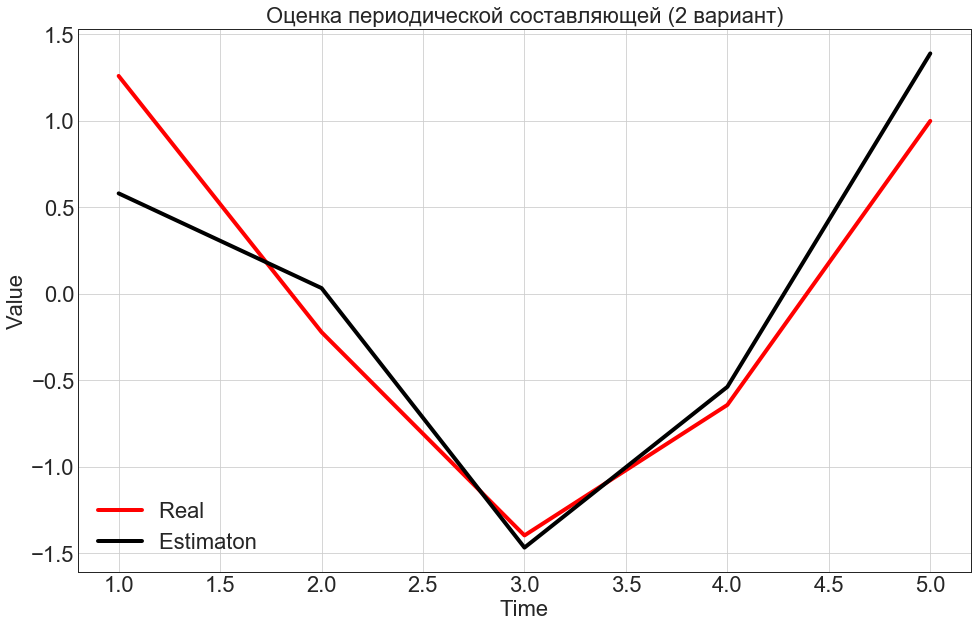

In [18]:
plt.title("Оценка периодической составляющей (2 вариант)")
plt.plot(t[:5], tr_per[:5], label=('Real ' ), color="red", linewidth=4)
plt.plot(t[:5], est_per_, label=('Estimaton '), color="black", linewidth=4)
plt.ylabel('Value')
plt.xlabel('Time')
plt.legend()
plt.grid()
plt.show()

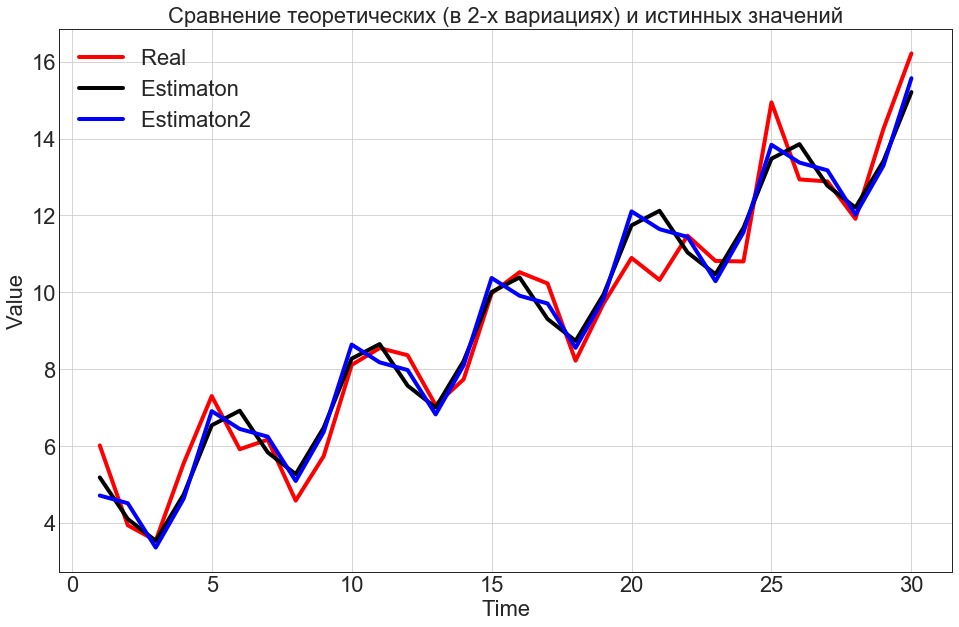

In [19]:
method1 = lp(X,m)
method2 = est_tr_+np.dot(np.ones((6,1)),est_per_.reshape((1,5))).reshape(30)
plt.title("Сравнение теоретических (в 2-х вариациях) и истинных значений")
plt.plot(t, y, label=('Real ' ), color="red", linewidth=4)
plt.plot(t, method1, label=('Estimaton '), color="black", linewidth=4)
plt.plot(t, method2, label=('Estimaton2 '), color="blue", linewidth=4)
plt.ylabel('Value')
plt.xlabel('Time')
plt.legend()
plt.grid()
plt.show()

### 9. Для каждого из методов оценки тренда и периодической составляющей вычислите остатки.

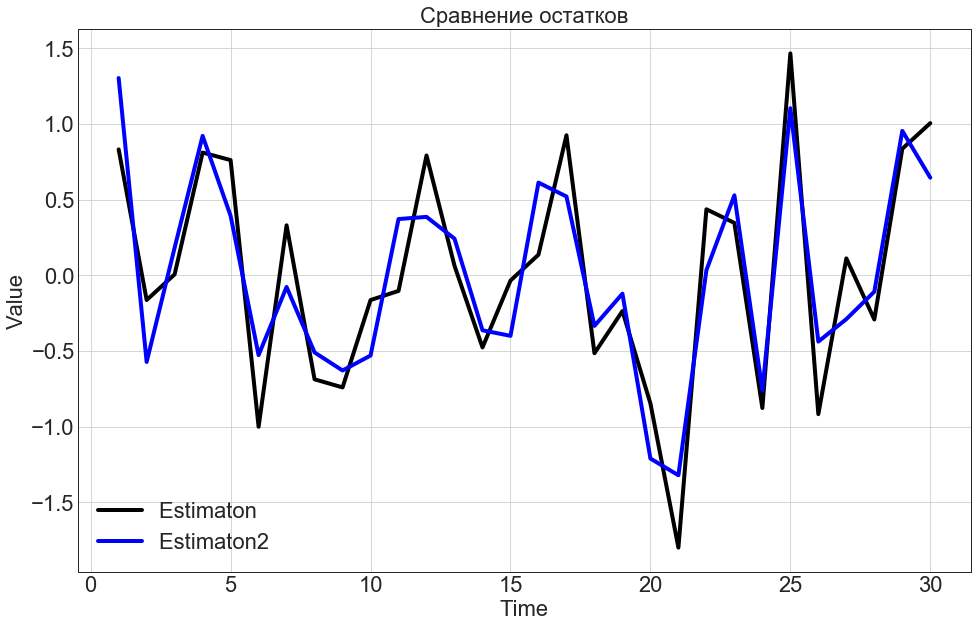

In [20]:
err_1 = y - method1
err_2 = y - method2
plt.title("Сравнение остатков")
plt.plot(t, err_1, label=('Estimaton '), color="black", linewidth=4)
plt.plot(t, err_2, label=('Estimaton2 '), color="blue", linewidth=4)
plt.ylabel('Value')
plt.xlabel('Time')
plt.legend()
plt.grid()
plt.show()

### 10. Проверьте гипотезу о случайности остатков. Постройте графики остатков.

In [21]:
def check_rand(err):
    print(len(err))
    median = np.median(err)
    print('median = ',median)
    positive = False
    v = 1
    k = [1]
    if err[0]>median:
        positive = True
    for i, item in enumerate(err[1:]):
        if positive:
            if item>median:
                k[-1] += 1
            else:
                k.append(1)
                v += 1
                positive = False
        else:
            if item<median:
                k[-1] += 1
            else:
                k.append(1)
                v += 1
                positive = True
    print('K = ', k)
    print('K_max = ',np.max(k))
    print('v = ', v)
    if (np.max(k)<3.3*np.log(len(err))+1):
        condition1 = True
    else:
        condition1 = False
        print('Условие 1 не выполнено')
    if (v>(len(err)+1-1.96*np.sqrt(len(err)-1))/2):
        condition2 = True
    else:
        condition2 = False
        print('Условие 2 не выполнено')
    if condition1 & condition2:
        print('Данный ряд остатков является случайным')
    else:
        print('Данный ряд остатков не является случайным')
print('Проверим случайность остатков для первого метода:')
check_rand(err_1)
print('Проверим случайность остатков для второго метода:')
check_rand(err_2)

Проверим случайность остатков для первого метода:
30
median =  -0.014389689122995764
K =  [1, 1, 3, 1, 1, 4, 2, 2, 2, 4, 2, 1, 1, 1, 1, 1, 2]
K_max =  4
v =  17
Данный ряд остатков является случайным
Проверим случайность остатков для второго метода:
30
median =  -0.09282099744046723
K =  [1, 1, 3, 1, 1, 3, 3, 2, 2, 4, 2, 1, 1, 3, 2]
K_max =  4
v =  15
Данный ряд остатков является случайным


### 11. Рассчитайте значения прогноза показателя $y$ для моментов времени $t=[31,34,37,41]$. Расчет прогноза сделайте отдельно для каждого метода. Отобразите прогнозы вместе с общими графиками методов вместе с истинной функцией.

#### Для истинной зависимости имеем:

In [22]:
t_pred = np.array([31, 34, 37, 41])
tr_trend_pred_0 = alpha + t_pred * beta[0]
tr_per_pred_0 = beta[1]*np.sin(2*np.pi*t_pred/5)+beta[2]*np.cos(2*np.pi*t_pred/5)
y_pred_0 = tr_trend_pred_0 + tr_per_pred_0
print(y_pred_0)

[15.80592884 15.00745413 16.53190023 19.48472325]


#### Предсказание для метода 1

In [23]:
tr_trend_pred_1 = m[0] + t_pred * m[1]
tr_per_pred_1 = m[2]*np.sin(2*np.pi*t_pred/5)+m[3]*np.cos(2*np.pi*t_pred/5)
y_pred_1 = tr_trend_pred_1 + tr_per_pred_1
print(y_pred_1)

[15.59026211 15.1496307  16.24221645 19.05865709]


#### Предсказание для метода 2

In [24]:
tr_trend_pred_2 = m_tr[0] + t_pred * m_tr[1]
tr_per_pred_2 = []
for time in t_pred:
    tr_per_pred_2.append(est_per_[time % 5])
y_pred_2 = tr_trend_pred_2 + tr_per_pred_2
print(y_pred_2)

[14.56135312 16.95800184 15.14012217 18.02663996]


####  Общий график

In [25]:
print(y_pred_0.shape)

(4,)


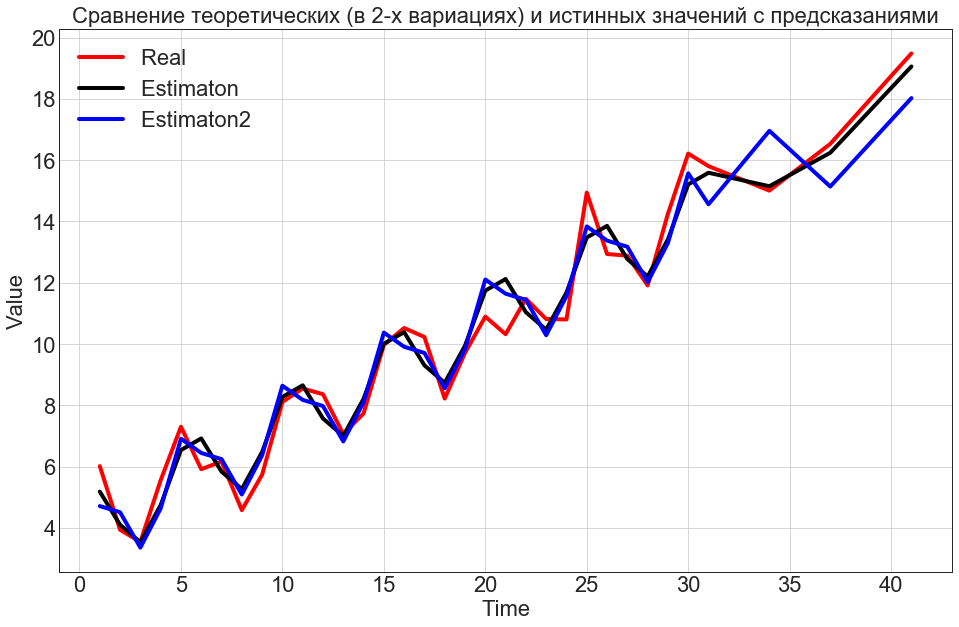

In [26]:
plt.title("Сравнение теоретических (в 2-х вариациях) и истинных значений с предсказаниями")
plt.plot(np.vstack((t.reshape(30,1),t_pred.reshape(4,1))), np.vstack((y.reshape(30,1),y_pred_0.reshape(4,1))), label=('Real ' ), color="red", linewidth=4)
plt.plot(np.vstack((t.reshape(30,1),t_pred.reshape(4,1))), np.vstack((method1.reshape(30,1),y_pred_1.reshape(4,1))), label=('Estimaton '), color="black", linewidth=4)
plt.plot(np.vstack((t.reshape(30,1),t_pred.reshape(4,1))), np.vstack((method2.reshape(30,1),y_pred_2.reshape(4,1))), label=('Estimaton2 '), color="blue", linewidth=4)
plt.ylabel('Value')
plt.xlabel('Time')
plt.legend()
plt.grid()
plt.show()

# 12. Выводы

## В процессе выполнения данной лабораторной работы было произведено:
1. Генерация временного ряда с дополнительным белым шумом.
2. Построение двух моделей регрессии.
3. Сравнение моделей.

### Графики обеих моделей достаточно сильно отличаются от истинной зависимости, что в свою очередь связано с тем, что $\alpha$ и $\beta$ в исходном ряду не являются значительно большими дисперсии $\sigma$ белого шума. Гипотезы о случайности остатков были подтверждены для обоих методов.